### Project
Identifying NFL Defenses' Strong and Weak Zones in 2023

### Source 
NFLSavant's "2023 Play By Play Data" dataset

### Objective 
Discover every NFL team's strong and weak zones in their run and pass defense. This will be done by analyzing every NFL team's mean and median yards allowed per rush attempt for each run direction, and analyzing every team's allowed completion % and mean yards allowed for each pass direction.  

## 1. Load CSV file

In [2]:
SELECT * FROM 'pbp-2023.csv';

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,column10,SeriesFirstDown,column12,NextScore,Description,TeamWin,column16,column17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2023121101,2023-12-11 00:00:00+00:00,3,1,28,NYG,GB,0,0,85,None,1,None,0,"46-R.BULLOCK EXTRA POINT IS GOOD, CENTER-59-C....",0,None,None,2023,0,UNDER CENTER,EXTRA POINT,0,0,0,0,None,0,0,0,None,0,0,0,0,0,0,None,15,OPP,0,None,0,None,0
1,2023121101,2023-12-11 00:00:00+00:00,3,1,35,NYG,GB,3,7,92,None,1,None,0,(1:35) (SHOTGUN) 15-T.DEVITO PASS SHORT RIGHT ...,0,None,None,2023,8,SHOTGUN,PASS,0,1,0,1,SHORT RIGHT,0,0,0,None,0,0,0,0,0,0,None,8,OPP,0,None,0,None,0
2,2023121101,2023-12-11 00:00:00+00:00,3,2,19,NYG,GB,2,11,88,None,0,None,0,(2:19) (SHOTGUN) 26-S.BARKLEY RIGHT GUARD TO G...,0,None,None,2023,4,SHOTGUN,RUSH,1,0,0,0,None,0,0,0,None,0,0,0,0,0,0,RIGHT GUARD,12,OPP,0,None,0,None,0
3,2023121101,2023-12-11 00:00:00+00:00,3,2,56,NYG,GB,1,10,89,None,0,None,0,(2:56) (SHOTGUN) 15-T.DEVITO UP THE MIDDLE TO ...,0,None,None,2023,-1,SHOTGUN,RUSH,1,0,0,0,None,0,0,0,None,0,0,0,0,0,0,CENTER,11,OPP,0,None,0,None,0
4,2023121101,2023-12-11 00:00:00+00:00,3,3,43,NYG,GB,1,10,64,None,1,None,0,(3:43) 15-T.DEVITO PASS DEEP LEFT TO 17-W.ROBI...,0,None,None,2023,25,UNDER CENTER,PASS,0,1,0,0,DEEP LEFT,0,0,0,None,0,0,0,0,0,0,None,36,OPP,0,None,0,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39467,2023091000,2023-09-10 00:00:00+00:00,2,14,1,ATL,CAR,0,0,100,None,1,None,0,TIMEOUT AT 14:01.,0,None,None,2023,0,UNDER CENTER,None,0,0,0,0,None,0,0,0,None,0,0,0,0,0,0,None,0,OPP,0,None,0,None,0
39468,2023091000,2023-09-10 00:00:00+00:00,2,14,52,CAR,ATL,0,0,100,None,1,None,0,TIMEOUT #1 BY CAR AT 14:52.,0,None,None,2023,0,UNDER CENTER,TIMEOUT,0,0,0,0,None,0,0,0,None,0,0,0,0,0,0,None,0,OPP,0,None,0,None,0
39469,2023091002,2023-09-10 00:00:00+00:00,4,9,11,CLE,CIN,0,0,100,None,1,None,0,TIMEOUT AT 09:11.,0,None,None,2023,0,UNDER CENTER,None,0,0,0,0,None,0,0,0,None,0,0,0,0,0,0,None,0,OPP,0,None,0,None,0
39470,2023091000,2023-09-10 00:00:00+00:00,1,4,13,ATL,CAR,2,6,57,None,0,None,0,(4:13) (SHOTGUN) 9-D.RIDDER SACKED AT CAR 46 F...,0,None,None,2023,-3,SHOTGUN,SACK,0,0,0,0,None,1,0,0,None,0,0,0,0,0,0,None,43,OPP,0,None,0,None,0


## 2. Filter data for run plays and create Pandas crosstabs that return mean and median yards allowed for each team and rush direction

### Why the mean and median?
- Specifically for running plays, average yards per play is extremely susceptible to outliers. Most run plays result in a 0-5 yard gain, but an occasional breakout run can be 20-99 yards. While these breakout runs are crucial to account for in our analysis, they can heavily influence the mean and not allow it to tell the full story of how many yards a defense truly gives up on a typical ~~play.~~

In [3]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#filter dataset for run plays
pbp_rush = pbp[pbp['PlayType'] == 'RUSH']

#crosstab that shows yards allowed per play by rush direction for each team
rush_def_yards = pd.crosstab(pbp_rush['DefenseTeam'], pbp_rush['RushDirection'], values=pbp_rush['Yards'], aggfunc='mean')
rush_def_yards = rush_def_yards[['LEFT END','LEFT TACKLE','LEFT GUARD', 'CENTER','RIGHT GUARD','RIGHT TACKLE','RIGHT END']]

#same crosstab but median to layer over heatmap
rush_def_yards_med = pd.crosstab(pbp_rush['DefenseTeam'], pbp_rush['RushDirection'], values=pbp_rush['Yards'], aggfunc='median')
rush_def_yards_med = rush_def_yards_med[['LEFT END','LEFT TACKLE','LEFT GUARD', 'CENTER','RIGHT GUARD','RIGHT TACKLE','RIGHT END']]

## 3. Create Seaborn heatmap that visualizes mean yards allowed per rush attempt

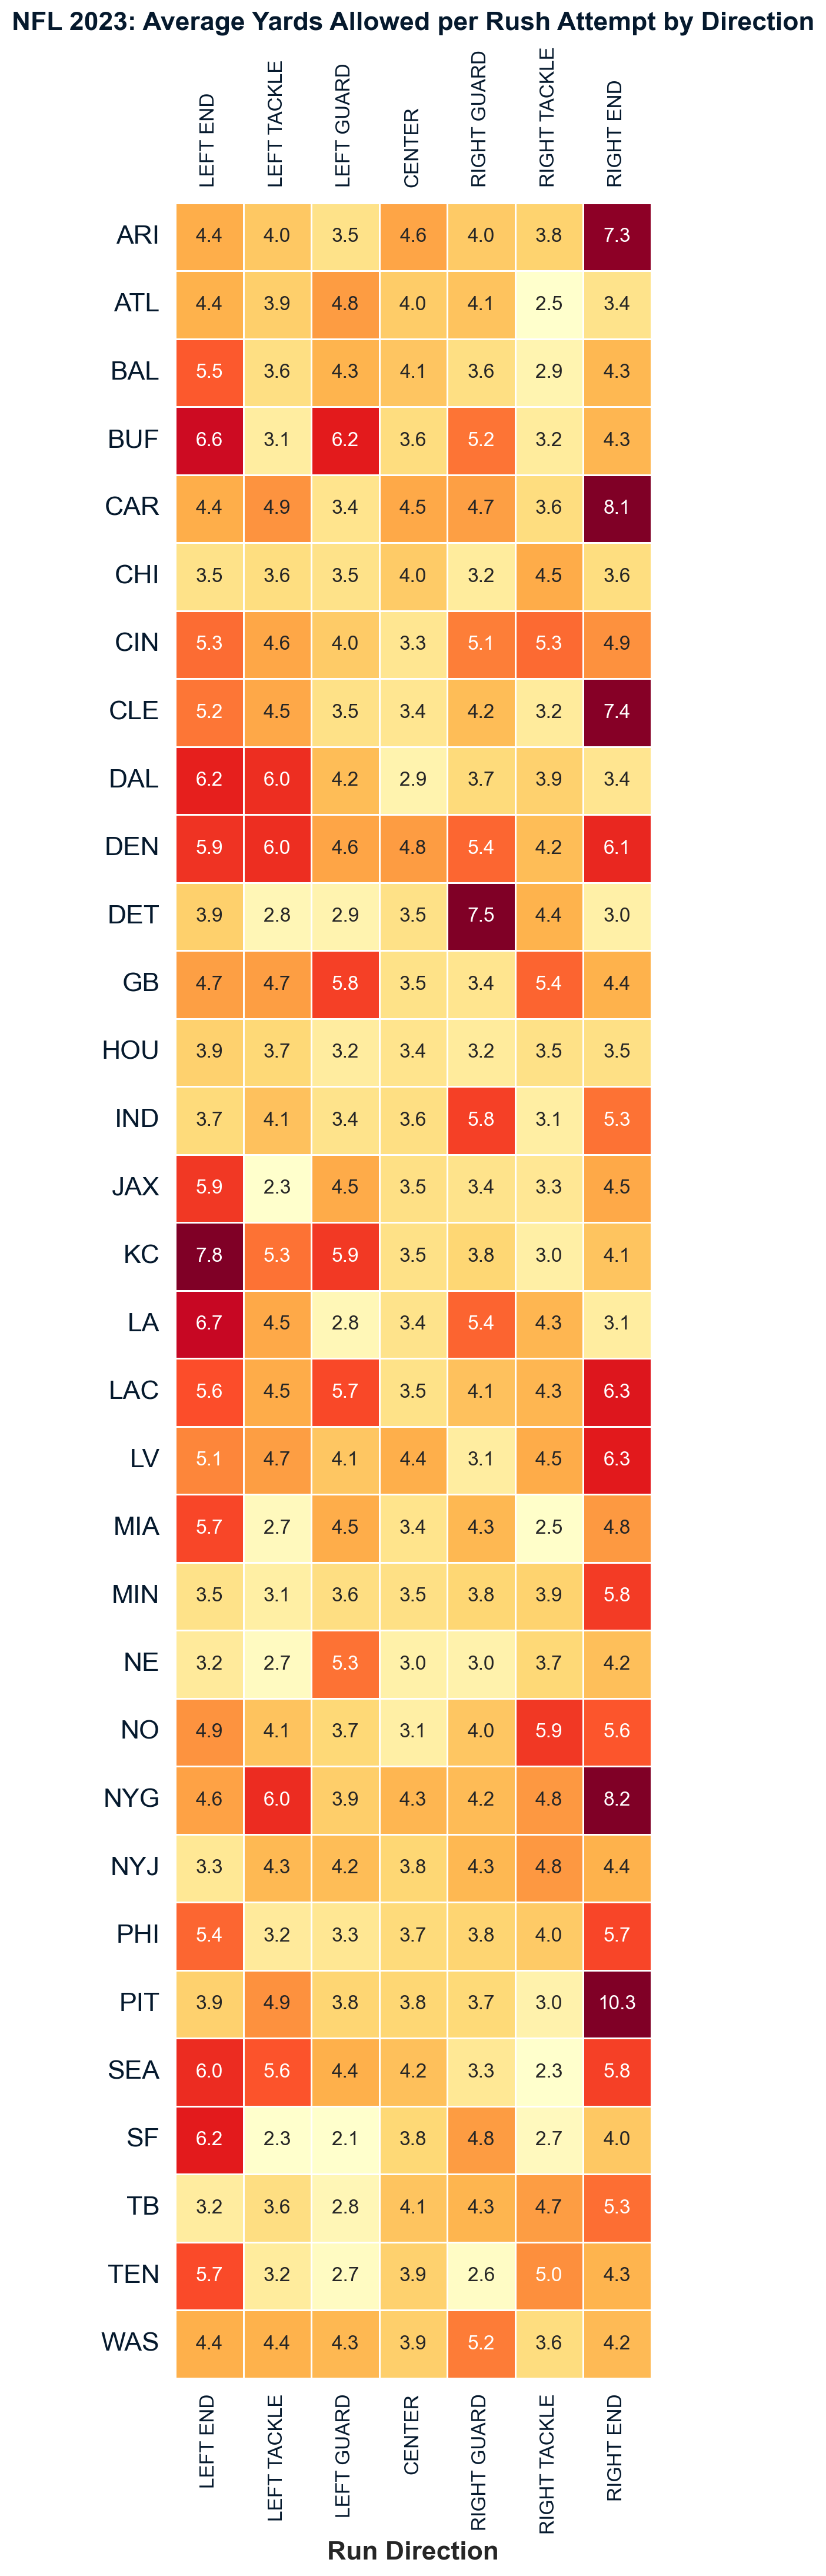

In [16]:
#heatmap function (written as function to use on fractions of teams for better looking graphics)
def heatmap_r(my_crosstab):
    #set sns theme and size for heatmap
    sns.set_theme(rc={'figure.figsize':(6,24)})
    sns.set_style('white')
    #YARDS ALLOWED BY RUN DIRECTION HEAT MAP
    rundir_heatmap = sns.heatmap(my_crosstab, annot=True, cmap='YlOrRd', linewidths=1, cbar=False,  square=True, fmt='.1f', vmin=2.5, vmax=7.5)

    #set title, xlabel, ylable, tick font sizes
    rundir_heatmap.set_title('NFL 2023: Average Yards Allowed per Rush Attempt by Direction', fontdict = {'weight':'bold', 'fontsize' : '16'}, y=1.075)
    rundir_heatmap.set_xlabel('Run Direction', fontdict = {'weight':'bold', 'fontsize' : '16'})
    rundir_heatmap.set_ylabel('')
    rundir_heatmap.xaxis.set_tick_params(labelsize = 12)
    rundir_heatmap.yaxis.set_tick_params(labelsize = 16)
    plt.gca().tick_params(axis="x", labelbottom=True, labeltop=True)
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90)
    plt.show()
    
heatmap_r(rush_def_yards)

## 4. Split heatmap, make slight adjustments, layer the median crosstab onto the heatmap, and add graphics/key for a more user-friendly visual

<table align="center">
    <tr>
        <td><img src="Slide1.PNG" width="400"></td>
        <td><img src="Slide2.PNG" width="400"></td>
    </tr>
    <tr>
        <td><img src="Slide3.PNG" width="400"></td>
        <td><img src="Slide4.PNG" width="400"></td>
    </tr>
</table>

### How can NFL teams use this run defense data?
- Self-Improvement 
    - For any given rush direction, if a team's mean and median yards allowed per rush are lower than other teams, they do a great job of filling these gaps on run plays and consistently stop runs coming in this direction. They should sustain the linemen and linebackers who defend this gap.
    - If a team gives up high mean and median yards per rush compared to other teams, they are consistently giving up big runs in that direction. They should consider replacing linemen and linebackers who defend that gap or changing their approach to defending runs in that direction.
    - In some cases, a team has low or average median yards allowed in a direction, but the mean is significantly higher. This means they don't typically give up big yardage in this direction, but they occasionally give up some really long runs causing the outlier influence. In this case, a team may want to improve how their secondary makes stops in this direction when the running back breaks through the defensive line.
     
- Strategy Against Opponents 
    - Teams should game plan to call a high volume of running plays in the directions where their opponent gives up high mean and median yards per rush. Running the ball in these directions should lead to consistent big gains in yardage.
    - While not as reliable as directions with high mean and median, teams may also want to consider running the ball where the defense has a much higher mean than median yards allowed, due to the potential of a "breakout" run. This is especially true if they desperately need to change the momentum of the game.
   - Teams should consider any players opponents have drafted, signed, or lost that could affect their defensive performance in specific rush directions. As the next season progresses, they should conduct a similar analysis to this one with the current season's data, for up-to-date insights on defensive weaknesses.

## 5. Filter data for pass plays and create Pandas crosstabs that return mean yards allowed and completion % allowed for each team and pass direction

In [5]:
#filter dataset for run plays
pbp_pass = pbp[pbp['PlayType'] == 'PASS']

#column that is 100 if if "incomplete" and "interception" columns are both zero, and zero if either column equals 1
pbp_pass['IsComplete100'] = (-1 * (pbp_pass['IsIncomplete'] + pbp_pass['IsInterception']) + 1) * 100

#crosstab that shows yards allowed per play by pass direction for each team
pass_def_yards = pd.crosstab(pbp_pass['DefenseTeam'], pbp_pass['PassType'], values=pbp_pass['Yards'], aggfunc='mean')
pass_def_yards = pass_def_yards[['SHORT LEFT','SHORT MIDDLE','SHORT RIGHT','DEEP LEFT','DEEP MIDDLE','DEEP RIGHT']]

#same crosstab but allowed completion % to layer over heatmap
pass_def_yards_pct = pd.crosstab(pbp_pass['DefenseTeam'], pbp_pass['PassType'], values=pbp_pass['IsComplete100'], aggfunc='mean')
pass_def_yards_pct = pass_def_yards_pct[['SHORT LEFT','SHORT MIDDLE','SHORT RIGHT','DEEP LEFT','DEEP MIDDLE','DEEP RIGHT']]

## 6. Create Seaborn heatmap that visualizes mean yards allowed per pass attempt

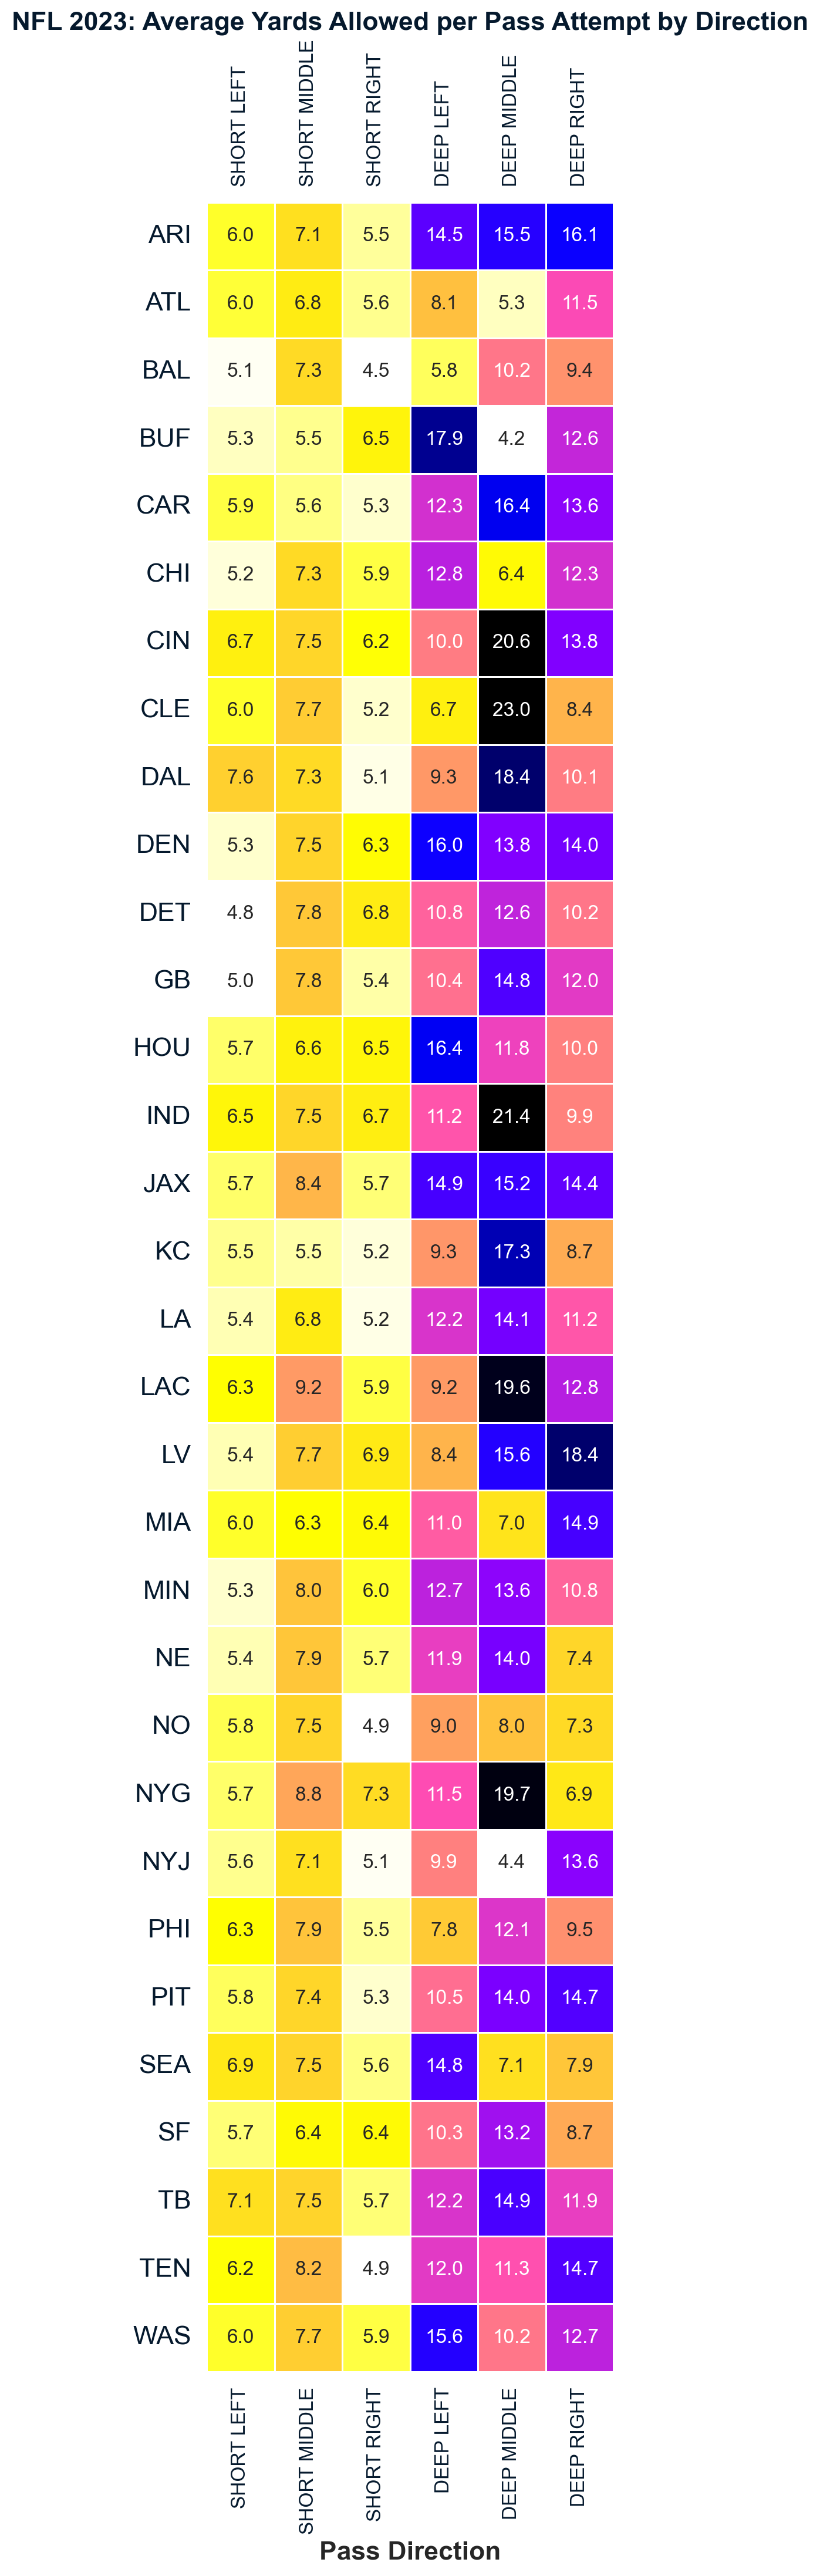

In [6]:
#heatmap function (written as function to use on fractions of teams for better looking graphics)
def heatmap_p(my_crosstab):
    #set sns theme and size for heatmap
    sns.set_theme(rc={'figure.figsize':(6,24)})
    sns.set_style('white')
    #YARDS ALLOWED BY RUN DIRECTION HEAT MAP
    rundir_heatmap = sns.heatmap(my_crosstab, annot=True, cmap='gnuplot2_r', linewidths=1, cbar=False,  square=True, fmt='.1f', vmin=5, vmax=20)

    #set title, xlabel, ylable, tick font sizes
    rundir_heatmap.set_title('NFL 2023: Average Yards Allowed per Pass Attempt by Direction', fontdict = {'weight':'bold', 'fontsize' : '16'}, y=1.075)
    rundir_heatmap.set_xlabel('Pass Direction', fontdict = {'weight':'bold', 'fontsize' : '16'})
    rundir_heatmap.set_ylabel('')
    rundir_heatmap.xaxis.set_tick_params(labelsize = 12)
    rundir_heatmap.yaxis.set_tick_params(labelsize = 16)
    plt.gca().tick_params(axis="x", labelbottom=True, labeltop=True)
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90)
    
    plt.show()
    
heatmap_p(pass_def_yards)

## 7. Split heatmap, make slight adjustments, layer the completion % crosstab onto the heatmap, and add graphics/key for a more user-friendly visual

<table align="center">
    <tr>
        <td><img src="Slide5.PNG" width="400"></td>
        <td><img src="Slide6.PNG" width="400"></td>
    </tr>
    <tr>
        <td><img src="Slide7.PNG" width="400"></td>
        <td><img src="Slide8.PNG" width="400"></td>
    </tr>
</table>

### How can NFL teams use this pass defense data?
- Self-Improvement 
    - If a team gives up fewer yards per play and a lower completion percentage than other teams in a certain pass direction, they should sustain the players who cover that area of the field and how that area is covered in their coverage schemes.
    - If they give up more completions and more yards than other teams in a given area, they should consider replacing players who cover that area or adjusting their strategy.
- Strategy Against Opponents 
    - Teams should game plan to call several pass plays where their best receivers are running routes into their opponent's "weak zones" or zones where they give up higher completion rates and more yards per play than other teams.
    - In a situation where a team desperately needs a couple of yards, such as 3rd/4th and short, teams should consider their opponent's allowed completion percentages for short passes. This can help them determine if they should throw a short pass in a certain direction in these situations, or if they have a better chance of running the ball.
    - Teams should consider any players opponents have drafted, signed, or lost that could affect their defensive performance in specific pass directions. As the next season progresses, they should conduct a similar analysis to this one with the current season's data, for up-to-date insights on defensive `weaknesses.`